C:\Users\pauls\AppData\Local\Temp\ipykernel_30164\2490392966.py:37: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pauls\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


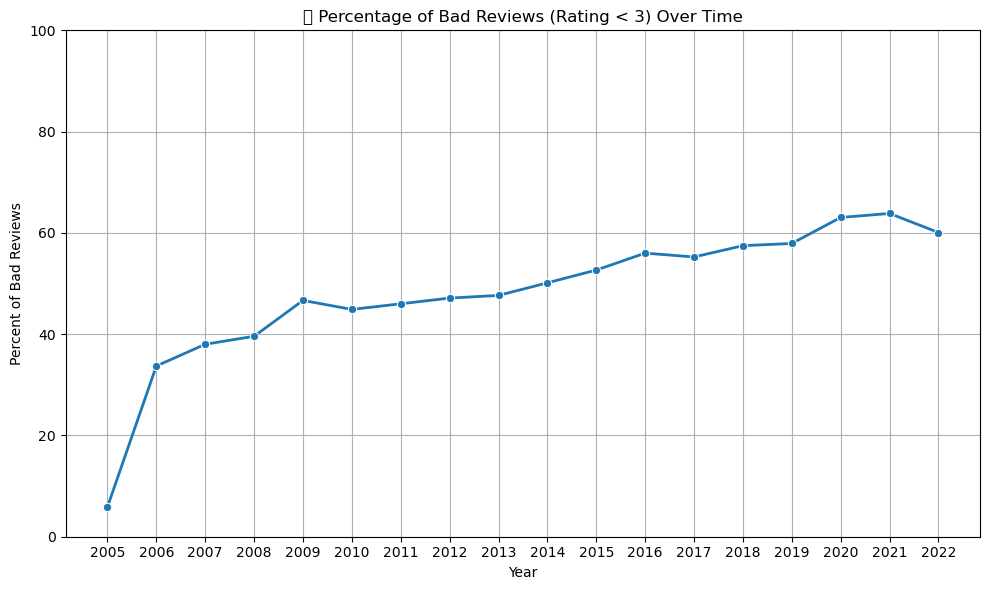

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("data/yelp_philadelphia.csv")

# Clean and prepare data
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date", "review_stars"])
df["year"] = df["date"].dt.year
df["is_bad_review"] = df["review_stars"] < 3  # Bad = star < 3

# Group by year
yearly_trend = df.groupby("year").agg(
    total_reviews=("review_stars", "count"),
    bad_reviews=("is_bad_review", "sum")
).reset_index()

# Calculate percentage
yearly_trend["bad_review_pct"] = (
    yearly_trend["bad_reviews"] / yearly_trend["total_reviews"]
) * 100

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=yearly_trend, x="year", y="bad_review_pct", marker="o", linewidth=2)

# Set integer ticks on x-axis
plt.xticks(ticks=range(yearly_trend["year"].min(), yearly_trend["year"].max() + 1, 1))

plt.title("📉 Percentage of Bad Reviews (Rating < 3) Over Time")
plt.xlabel("Year")
plt.ylabel("Percent of Bad Reviews")
plt.ylim(0, 100)
plt.grid(True)
plt.tight_layout()
plt.show()


In [8]:
yearly_trend["bad_review_pct"]

0      5.882353
1     33.707865
2     38.006757
3     39.584503
4     46.664529
5     44.887202
6     45.999026
7     47.128355
8     47.650610
9     50.137799
10    52.662559
11    56.001793
12    55.244877
13    57.472661
14    57.912792
15    63.046662
16    63.838210
17    60.074627
Name: bad_review_pct, dtype: float64

C:\Users\pauls\AppData\Local\Temp\ipykernel_30164\3679077733.py:55: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=lowest_df, x="year", y="review_stars", hue="neighborhood", marker="o", palette=palette)
C:\Users\pauls\AppData\Local\Temp\ipykernel_30164\3679077733.py:62: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pauls\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


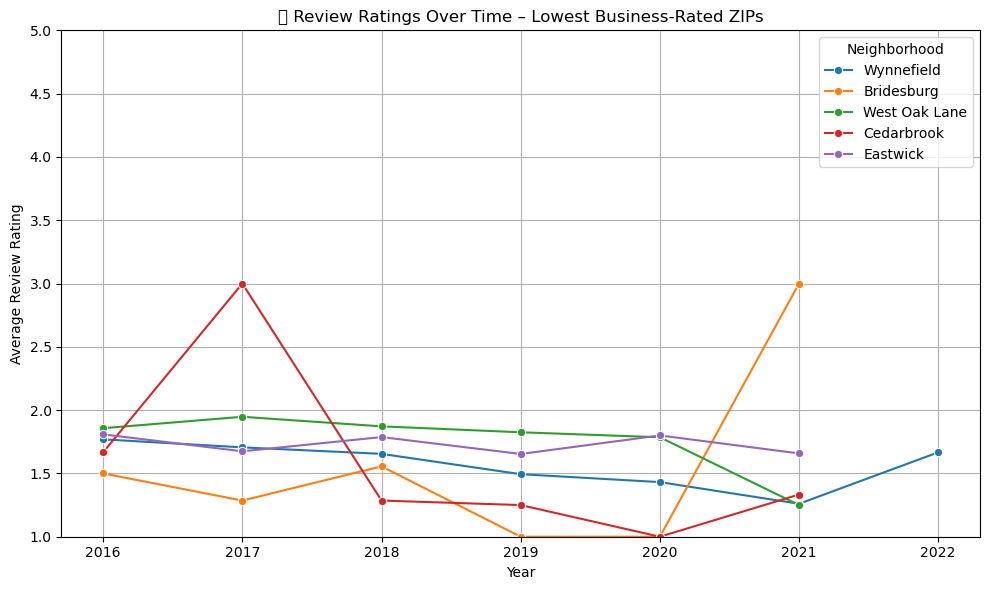

C:\Users\pauls\AppData\Local\Temp\ipykernel_30164\3679077733.py:68: UserWarning: The palette list has more values (10) than needed (5), which may not be intended.
  sns.lineplot(data=highest_df, x="year", y="review_stars", hue="neighborhood", marker="o", palette=palette)
C:\Users\pauls\AppData\Local\Temp\ipykernel_30164\3679077733.py:75: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\pauls\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


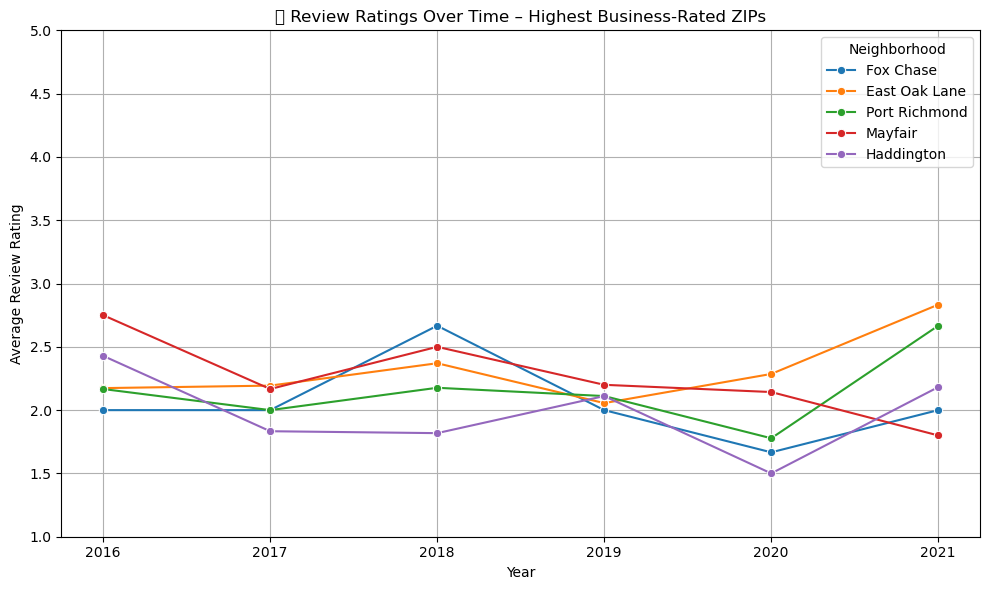

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("data/yelp_philadelphia.csv")

# ZIP to neighborhood mapping (extend as needed)
zip_to_neighborhood = {
    19111: "Fox Chase",
    19126: "East Oak Lane",
    19134: "Port Richmond",
    19135: "Mayfair",
    19139: "Haddington",
    19131: "Wynnefield",
    19137: "Bridesburg",
    19138: "West Oak Lane",
    19150: "Cedarbrook",
    19153: "Eastwick"
}

# Convert date and clean
df["date"] = pd.to_datetime(df["date"], errors="coerce")
df = df.dropna(subset=["date", "review_stars", "business_stars", "postal_code", "business_id"])

# --- STEP 1: Compute avg business_stars per ZIP from full data ---
unique_biz = df.drop_duplicates(subset="business_id")
zip_business_avg = unique_biz.groupby("postal_code")["business_stars"].mean().sort_values()

# Identify lowest and highest 5 ZIPs by avg business rating
lowest_zips = zip_business_avg.head(5).index.tolist()
highest_zips = zip_business_avg.tail(5).index.tolist()
target_zips = lowest_zips + highest_zips

# --- STEP 2: Get avg review_stars by ZIP/year (2016+) ---
df["year"] = df["date"].dt.year
df_2016 = df[df["year"] >= 2016].copy()
zip_yearly_reviews = df_2016[df_2016["postal_code"].isin(target_zips)]

# Group and map ZIP to neighborhood
zip_yearly_avg = (
    zip_yearly_reviews
    .groupby(["postal_code", "year"])["review_stars"]
    .mean()
    .reset_index()
)
zip_yearly_avg["neighborhood"] = zip_yearly_avg["postal_code"].map(zip_to_neighborhood)

# --- STEP 3: Plotting ---
palette = sns.color_palette("tab10")

# Plot: Lowest-rated business ZIPs
lowest_df = zip_yearly_avg[zip_yearly_avg["postal_code"].isin(lowest_zips)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=lowest_df, x="year", y="review_stars", hue="neighborhood", marker="o", palette=palette)
plt.title("⭐ Review Ratings Over Time – Lowest Business-Rated ZIPs")
plt.xlabel("Year")
plt.ylabel("Average Review Rating")
plt.ylim(1, 5)
plt.grid(True)
plt.legend(title="Neighborhood")
plt.tight_layout()
plt.show()

# Plot: Highest-rated business ZIPs
highest_df = zip_yearly_avg[zip_yearly_avg["postal_code"].isin(highest_zips)]
plt.figure(figsize=(10, 6))
sns.lineplot(data=highest_df, x="year", y="review_stars", hue="neighborhood", marker="o", palette=palette)
plt.title("⭐ Review Ratings Over Time – Highest Business-Rated ZIPs")
plt.xlabel("Year")
plt.ylabel("Average Review Rating")
plt.ylim(1, 5)
plt.grid(True)
plt.legend(title="Neighborhood")
plt.tight_layout()
plt.show()
